## Menginstal Library Yang di Perlukan & Mengimportnya

In [ ]:
!pip install tensorflowjs
!pip install scikeras
!pip install tensorflow_decision_forests
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 898.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [ ]:
# from google.colab import files

# uploaded = files.upload()

## Mengecek Data

In [ ]:
df = pd.read_csv('/content/financial_health_dataset_balanced.csv')
print(df.head(50))

    Total_Pemasukan_Belum  Total_Pengeluaran_Belum  Total_Anggaran_Belum  \
0                16082229                  6803764               6822938   
1                18685607                 14205667              14279645   
2                12247530                  7649083               6628140   
3                12178611                  9588350               6749203   
4                19200902                 11450528               9771255   
5                19326749                 13998907              13304751   
6                12524028                 14696383              12031097   
7                19994023                 16498938              18144129   
8                 7997767                  5048282               3587973   
9                12794603                  9189027               6730319   
10                7837842                  5619636               4314224   
11                9209033                 10993162              10341405   
12          

In [ ]:
print(df.describe())
df.shape

       Total_Pemasukan_Belum  Total_Pengeluaran_Belum  Total_Anggaran_Belum  \
count           5.100000e+03             5.100000e+03          5.100000e+03   
mean            1.153187e+07             7.684015e+06          6.932902e+06   
std             4.799267e+06             4.824364e+06          4.505211e+06   
min             3.000564e+06             6.070890e+05          5.595620e+05   
25%             7.421269e+06             3.943404e+06          3.470138e+06   
50%             1.155910e+07             6.513612e+06          5.796566e+06   
75%             1.553968e+07             1.054166e+07          9.348601e+06   
max             1.999799e+07             2.370062e+07          2.470023e+07   

       Total_Tabungan_Belum  Total_Pemasukan  Total_Pengeluaran  \
count          5.100000e+03     5.100000e+03       5.100000e+03   
mean           2.012014e+06     1.153135e+07       7.684765e+06   
std            1.459667e+06     4.799409e+06       4.824701e+06   
min            4.110

(5100, 9)

## EDA

In [ ]:
# Menampilkan jumlah baris dan kolom
jumlah_baris = df.shape[0]
jumlah_kolom = df.shape[1]
print(f"Jumlah baris: {jumlah_baris}")
print(f"Jumlah kolom: {jumlah_kolom}")

# Menampilkan informasi tipe data setiap kolom
print(df.dtypes)

Jumlah baris: 5100
Jumlah kolom: 9
Total_Pemasukan_Belum          int64
Total_Pengeluaran_Belum        int64
Total_Anggaran_Belum           int64
Total_Tabungan_Belum           int64
Status_Kesehatan_Finansial    object
Total_Pemasukan                int64
Total_Pengeluaran              int64
Total_Anggaran                 int64
Total_Tabungan                 int64
dtype: object


In [ ]:
print(df.isnull().sum())
# Tidak ditemukan data missing atau hilang

Total_Pemasukan_Belum         0
Total_Pengeluaran_Belum       0
Total_Anggaran_Belum          0
Total_Tabungan_Belum          0
Status_Kesehatan_Finansial    0
Total_Pemasukan               0
Total_Pengeluaran             0
Total_Anggaran                0
Total_Tabungan                0
dtype: int64


### Mendeteksi Apakah Ada Duplikat

In [ ]:
# Cek jumlah data duplikat
print("Jumlah duplikasi:", df.duplicated().sum())

Jumlah duplikasi: 0


### Menghilangkan Data Yang Tidak Terpakai

In [ ]:
drop_columns = ['Total_Pemasukan_Belum','Total_Pengeluaran_Belum','Total_Anggaran_Belum','Total_Tabungan_Belum',]
df.drop(drop_columns, axis=1, inplace=True)

In [ ]:
drop_columns = ['Total_Anggaran','Total_Tabungan']
df.drop(drop_columns, axis=1, inplace=True)

In [ ]:
print(df.head(50))

   Status_Kesehatan_Finansial  Total_Pemasukan  Total_Pengeluaran
0                       Sehat         16100000            6800000
1             Perlu Perhatian         18700000           14200000
2             Perlu Perhatian         12200000            7600000
3             Perlu Perhatian         12200000            9600000
4             Perlu Perhatian         19200000           11500000
5             Perlu Perhatian         19300000           14000000
6                    Berisiko         12500000           14700000
7                    Berisiko         20000000           16500000
8             Perlu Perhatian          8000000            5000000
9             Perlu Perhatian         12800000            9200000
10            Perlu Perhatian          7800000            5600000
11                   Berisiko          9200000           11000000
12                      Sehat         11800000            3500000
13            Perlu Perhatian         14100000           10700000
14        

### Analisis Distribusi dan Korelasi

       Total_Pemasukan  Total_Pengeluaran
count             5100               5100
mean          11531352            7684764
std            4799409            4824701
min            3000000             600000
25%            7400000            3900000
50%           11600000            6500000
75%           15500000           10500000
max           20000000           23700000


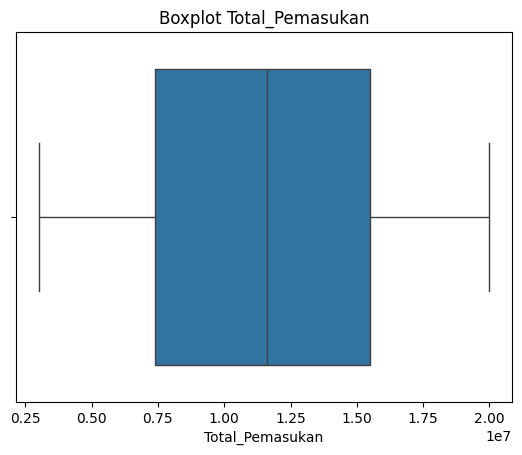

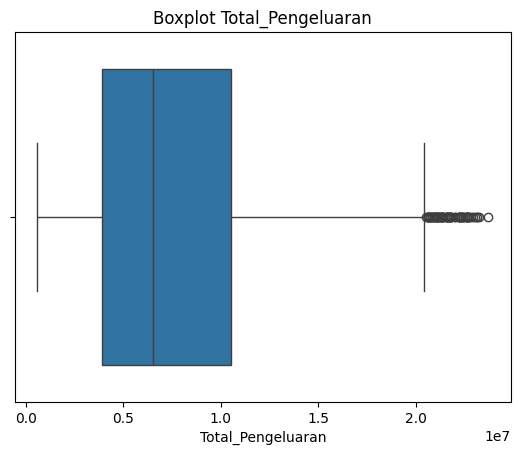

In [ ]:
describe_df = df.describe()

# Mengubah tipe data kolom yang tidak mengandung desimal menjadi integer
for column in describe_df.columns:
    if df[column].dtype == 'int64':
        describe_df[column] = describe_df[column].astype(int)
print(describe_df)

# Visualisasi distribusi data numerik dengan boxplot
for column in df.select_dtypes(include='number').columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot {column}')
    plt.show()

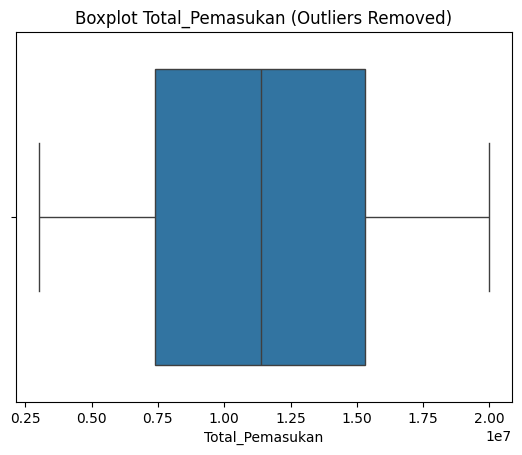

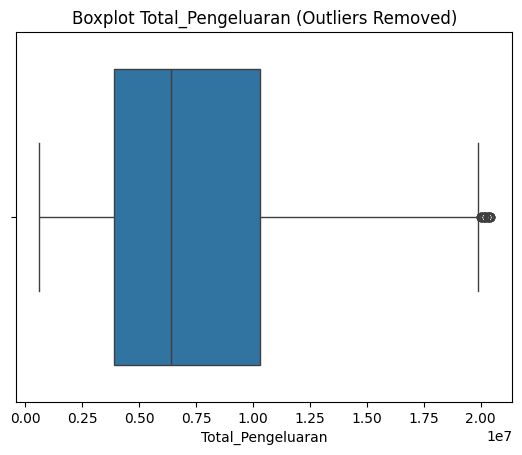

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Menghapus outlier menggunakan metode IQR untuk semua kolom numerik
for column in df.select_dtypes(include='number').columns:
    df = remove_outliers_iqr(df, column)

# Visualisasi distribusi data numerik dengan boxplot setelah menghilangkan outlier
for column in df.select_dtypes(include='number').columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot {column} (Outliers Removed)')
    plt.show()

## Preprocess


In [ ]:
X = df.drop('Status_Kesehatan_Finansial', axis=1)
y = df['Status_Kesehatan_Finansial']

In [ ]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
df['Status_Kesehatan_Finansial'] = label_encoder.fit_transform(df['Status_Kesehatan_Finansial'])

# b. One-Hot Encoding for categorical features:
categorical_features = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# c. Scaling for numerical features:
numerical_features = X_encoded.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])

In [ ]:
print(X_encoded.head())

   Total_Pemasukan  Total_Pengeluaran
0         0.984763          -0.150197
1         1.532373           1.474486
2         0.163347           0.025444
3         0.163347           0.464548
4         1.637683           0.881696


In [ ]:
# Mengecek hasil encoding dan scaling
comparison_df = pd.DataFrame({'Original Label': df['Status_Kesehatan_Finansial'],
                             'Encoded Label': y})

# Display the comparison
print(comparison_df.head(20)) # Displaying first 20 rows for demonstration. Adjust as needed

    Original Label  Encoded Label
0                2              2
1                1              1
2                1              1
3                1              1
4                1              1
5                1              1
6                0              0
7                0              0
8                1              1
9                1              1
10               1              1
11               0              0
12               2              2
13               1              1
14               0              0
15               0              0
16               1              1
17               2              2
18               1              1
19               0              0


Penjelasan encoding :  
Sehat | 2  
Perlu Perhatian | 1  
Beresiko | 0

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [ ]:
# Preprocessing untuk kolom numerik
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing untuk kolom kategorikal
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan preprocessing numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

## Models


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Ambil fitur dan label
X = df[['Total_Pemasukan', 'Total_Pengeluaran']]
y = df['Status_Kesehatan_Finansial']

# Encode label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Train XGBoost
xgb_model = XGBClassifier(
    n_estimators=50,
    max_depth=3,
    use_label_encoder=False,
    eval_metric='mlogloss',
    n_jobs=-1
)
xgb_model.fit(X_train, y_train)

# Evaluasi
y_pred = xgb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_.astype(str)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9721669980119284
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       334
           1       0.93      0.98      0.96       319
           2       0.99      0.98      0.99       353

    accuracy                           0.97      1006
   macro avg       0.97      0.97      0.97      1006
weighted avg       0.97      0.97      0.97      1006

Confusion Matrix:
 [[320  14   0]
 [  4 313   2]
 [  0   8 345]]


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:04:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Akurasi XGBoost: 0.9722
Classification Report XGBoost:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       334
           1       0.93      0.98      0.96       319
           2       0.99      0.98      0.99       353

    accuracy                           0.97      1006
   macro avg       0.97      0.97      0.97      1006
weighted avg       0.97      0.97      0.97      1006



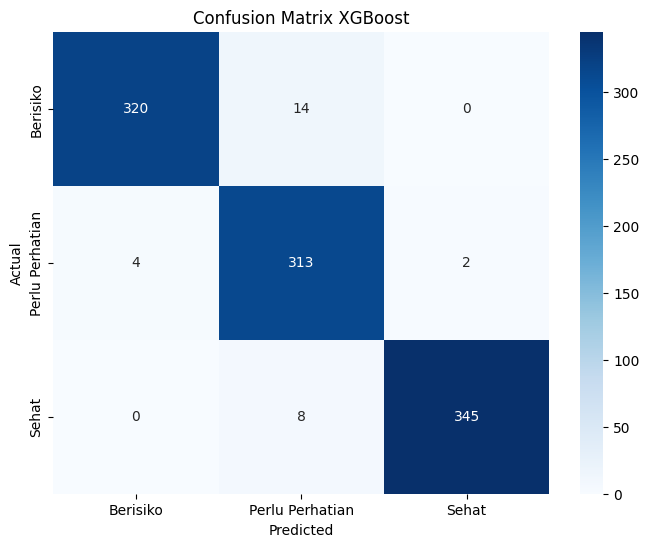

In [ ]:
y_pred_xgb = xgb_model.predict(X_test)

# Akurasi
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Akurasi XGBoost: {acc_xgb:.4f}")

# Classification Report
print("Classification Report XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix XGBoost')
plt.show()

### Save model

In [ ]:
import joblib

joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [ ]:
!pip install skl2onnx
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.4
    Uninstalling protobuf-5.29.4:
      Successfully uninstalled protobuf-5.29.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.17.0 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.2 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.2 which is incompatible.
ydf 0.11.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.2 which is incompatible.
t

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.8 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.models import save_model
import tensorflowjs as tfjs
import pickle
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnxruntime as rt
import tensorflow_decision_forests as tfdf

In [ ]:
# Periksa apakah ada fitur kategoris sebelum mengakses OneHotEncoder
if len(categorical_features) > 0:

    feature_names = list(preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features))
    feature_names.extend(numerical_features)
else:
    # If no categorical features, use only numerical features
    feature_names = list(numerical_features)

print("Features used in the model:")
for feature in feature_names:
    print(feature)

# Access and print the feature importances from the trained RandomForestClassifier model
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print("\nFeature Importances:")
feature_importances

Features used in the model:
Total_Pemasukan
Total_Pengeluaran

Feature Importances:


,0
Total_Pengeluaran,0.622308
Total_Pemasukan,0.377692


In [ ]:
!tensorflowjs_converter --input_format keras /content/student_model.h5 tfjs_student_model/

2025-04-14 13:07:05.263694: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744636025.284089    5893 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744636025.290075    5893 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744636025.305766    5893 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744636025.305790    5893 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744636025.305793    5893 computation_placer.cc:177] computation placer alr

## Testing Model

In [ ]:
# # Label prediksi yang benar adalah Sehat | 2, CGPT

# sehat_data = pd.DataFrame({
#     # 'ID': [1, 2, 3],
#     'Total_Pemasukan': [15_000_000],
#     'Total_Pengeluaran': [10_000_000],
#     'Total_Tabungan': [3_500_000],
#     'Total_Anggaran': [11_000_000],
#     # 'Hutang (IDR)': [10000000, 25000000, 40000000],
#     # 'Rasio Hutang/Penghasilan': [3.33, 4.17, 4.44],
#     # 'Total Aset': [50000000, 120000000, 200000000],
#     # 'Total Hutang': [10000000, 25000000, 40000000],
#     # 'Status_Kesehatan_Financial': ['Cukup', 'Baik', 'Sangat Baik'],
#     # 'Jumlah Tanggungan': [1, 2, 4]
# })

In [ ]:
# Label prediksi yang benar adalah Sehat | 2

sehat_data = pd.DataFrame({
    # 'ID': [1, 2, 3],
    'Total_Pemasukan': [16100000],
    'Total_Pengeluaran': [6800000],
    # 'Total_Tabungan': [3000000],
    # 'Total_Anggaran': [6800000],
    # 'Hutang (IDR)': [10000000, 25000000, 40000000],
    # 'Rasio Hutang/Penghasilan': [3.33, 4.17, 4.44],
    # 'Total Aset': [50000000, 120000000, 200000000],
    # 'Total Hutang': [10000000, 25000000, 40000000],
    # 'Status_Kesehatan_Financial': ['Cukup', 'Baik', 'Sangat Baik'],
    # 'Jumlah Tanggungan': [1, 2, 4]
})

In [ ]:
# Label prediksi yang benar adalah Perlu Perhatian | 1 (Confirm by CGPT)

cukup_data = pd.DataFrame({
    # 'ID': [1, 2, 3],
    'Total_Pemasukan': [12200000],
    'Total_Pengeluaran': [7600000],
    # 'Total_Tabungan': [3500000],
    # 'Total_Anggaran': [14300000],
    # 'Hutang (IDR)': [10000000, 25000000, 40000000],
    # 'Rasio Hutang/Penghasilan': [3.33, 4.17, 4.44],
    # 'Total Aset': [50000000, 120000000, 200000000],
    # 'Total Hutang': [10000000, 25000000, 40000000],
    # 'Status_Kesehatan_Financial': ['Cukup', 'Baik', 'Sangat Baik'],
    # 'Jumlah Tanggungan': [1, 2, 4]
})

In [ ]:
# Label prediksi yang benar adalah Beresiko | 0 (Confirm by CGPT)

beresiko_data = pd.DataFrame({
    # 'ID': [1, 2, 3],
    'Total_Pemasukan': [12500000],
    'Total_Pengeluaran': [14700000],
    # 'Total_Tabungan': [1400000],
    # 'Total_Anggaran': [12000000],
    # 'Hutang (IDR)': [10000000, 25000000, 40000000],
    # 'Rasio Hutang/Penghasilan': [3.33, 4.17, 4.44],
    # 'Total Aset': [50000000, 120000000, 200000000],
    # 'Total Hutang': [10000000, 25000000, 40000000],
    # 'Status_Kesehatan_Financial': ['Cukup', 'Baik', 'Sangat Baik'],
    # 'Jumlah Tanggungan': [1, 2, 4]
})

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/student_model.keras')

# Praproses data baru dengan preprocessor yang sama
sehat_data_preprocessed = preprocessor.transform(sehat_data)

# Prediksi menggunakan model
predictions = model.predict(sehat_data_preprocessed)

# Tampilkan hasil prediksi
print(predictions)

# Decode prediksi jika perlu (jika label encoder digunakan)
decoded_predictions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))
print(decoded_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[0. 0. 1.]]
['Sehat']


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/student_model.keras')

# Praproses data baru dengan preprocessor yang sama
cukup_data_preprocessed = preprocessor.transform(cukup_data)

# Prediksi menggunakan model
predictions = model.predict(cukup_data_preprocessed)

# Tampilkan hasil prediksi
print(predictions)

# Decode prediksi jika perlu (jika label encoder digunakan)
decoded_predictions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))
print(decoded_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[0. 1. 0.]]
['Perlu Perhatian']


In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/student_model.keras')

# Praproses data baru dengan preprocessor yang sama
beresiko_data_preprocessed = preprocessor.transform(beresiko_data)

# Prediksi menggunakan model
predictions = model.predict(beresiko_data_preprocessed)

# Tampilkan hasil prediksi
print(predictions)

# Decode prediksi jika perlu (jika label encoder digunakan)
decoded_predictions = label_encoder.inverse_transform(np.argmax(predictions, axis=1))
print(decoded_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
[[0.03738657 0.9476627  0.01495069]]
['Perlu Perhatian']


In [ ]:
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the model
sckit_model = joblib.load('/content/xgb_model.pkl')

# --- Apply the same preprocessing steps used during training ---
# Assuming 'numerical_features' and 'categorical_features' are defined as in your original code
numerical_features = sehat_data.select_dtypes(include=['number']).columns
categorical_features = sehat_data.select_dtypes(include=['object']).columns

# Create the preprocessing pipeline (same as during training)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform (or just transform if already fitted) the new data
sehat_data_preprocessed = preprocessor.fit_transform(sehat_data)

# Now make predictions
predictions = sckit_model.predict(sehat_data_preprocessed)

# Decode predictions using the label encoder
decoded_predictions = label_encoder.inverse_transform(predictions)
decoded_predictions

array(['Sehat'], dtype=object)

In [ ]:
beresiko_data = pd.DataFrame({
    'Total_Pemasukan': [10200000],
    'Total_Pengeluaran': [5600000],
})

scaler.fit(X)

beresiko_data_encoded = scaler.transform(beresiko_data)

prediksi = xgb_model.predict(beresiko_data_encoded)

print("Prediksi Kelas Model XGBoost:", prediksi[0])

label_asli = [0]
akurasi = accuracy_score(label_asli, prediksi)
print("Apakah prediksi benar?", "Ya" if prediksi[0] == 0 else "Tidak")
print("Akurasi pada data baru:", akurasi)

Prediksi Kelas Model XGBoost: 1
Apakah prediksi benar? Tidak
Akurasi pada data baru: 0.0


In [ ]:
# Load the model
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
xgb_model = joblib.load('/content/xgb_model.pkl')

beresiko_data = pd.DataFrame({
    'Total_Pemasukan': [8000000],
    'Total_Pengeluaran': [5000000],
})

# Initialize the StandardScaler (if not already done globally)
scaler = StandardScaler()

In [ ]:
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the model
sckit_model = joblib.load('/content/xgb_model.pkl')

# --- Apply the same preprocessing steps used during training ---
# Assuming 'numerical_features' and 'categorical_features' are defined as in your original code
numerical_features = cukup_data.select_dtypes(include=['number']).columns
categorical_features = cukup_data.select_dtypes(include=['object']).columns

# Create the preprocessing pipeline (same as during training)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform (or just transform if already fitted) the new data
cukup_data_preprocessed = preprocessor.fit_transform(cukup_data)

# Now make predictions
predictions = sckit_model.predict(cukup_data_preprocessed)

# Decode predictions using the label encoder
decoded_predictions = label_encoder.inverse_transform(predictions)
decoded_predictions

array(['Sehat'], dtype=object)

In [ ]:
import joblib
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load the model
sckit_model = joblib.load('/content/xgb_model.pkl')

# --- Apply the same preprocessing steps used during training ---
# Assuming 'numerical_features' and 'categorical_features' are defined as in your original code
numerical_features = beresiko_data.select_dtypes(include=['number']).columns
categorical_features = beresiko_data.select_dtypes(include=['object']).columns

# Create the preprocessing pipeline (same as during training)
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Fit and transform (or just transform if already fitted) the new data
beresiko_data_preprocessed = preprocessor.fit_transform(beresiko_data)

# Now make predictions
predictions = sckit_model.predict(beresiko_data_preprocessed)

# Decode predictions using the label encoder
decoded_predictions = label_encoder.inverse_transform(predictions)
decoded_predictions

array(['Sehat'], dtype=object)